
# Lib

In [39]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-py3-none-any.whl.metadata
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c6/c8/6936e8c7b279a5abac82f399d8d72ac25da530cf5f78a0e40063e492558c/matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/00/48/8e9ca9e17de09f5a18d9afb3a3f456689491b985bd144ccc1d9b0c3c06bf/fonttools-4.53.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
device

device(type='cuda')

# Train model 

## Tranfer learning

###  Lib

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # Import tqdm for progress bar

In [2]:
# Chuẩn bị dữ liệu
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize dữ liệu
])

In [3]:

# Tải và chuẩn bị dữ liệu CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


### Set up paramter

In [26]:
# Khởi tạo mô hình ResNet-18
model = models.resnet18(pretrained=True)

# Đóng băng các layer convolutional ban đầu để giữ lại các trọng số đã học
for param in model.parameters():
    param.requires_grad = False

# Thay đổi fully connected layer (fc) ở cuối để phù hợp với CIFAR-10
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Chỉ tải các trọng số của phần convolutional từ mô hình đã huấn luyện trước
pretrained_dict = torch.load('resnet18_pretrained.pth')
model_dict = model.state_dict()
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and 'fc' not in k}
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)

# Định nghĩa hàm mất mát và bộ tối ưu hóa
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



Files already downloaded and verified
Files already downloaded and verified


d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda


In [55]:
import torch
import torchvision.models as models

# Load pre-trained ResNet50 model
# model = models.resnet50(pretrained=True)

# In ra tên của mô hình
print("Model structure:")
print(model)

# Dùng named_children() để lặp qua các layer
for name, layer in model.named_children():
    print(f"Layer: {name}")

# Dùng named_modules() để lặp qua các module (bao gồm cả nested module)
for name, module in model.named_modules():
    print(f"Module: {name}")

# In ra chi tiết của từng layer
for name, param in model.named_parameters():
    print(f"Parameter: {name}, Size: {param.size()}")

# Lấy danh sách các layer
layer_list = list(model.children())

# Lấy layer cuối cùng
last_layer = layer_list[-1]
print("Last layer: ",last_layer)

Model structure:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU

### Training

In [27]:
model.to(device)

# Huấn luyện mô hình
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0.0
    total_testing_accuracies = []
    
    # Training phase
    model.train()
    print(f"Epoch [{epoch + 1}/{num_epochs}] started.")
    train_progress_bar = tqdm(trainloader, desc=f'Training Epoch {epoch + 1}/{num_epochs}')
    for i, (img, labels) in enumerate(train_progress_bar):
        img = img.to(device)
        labels = labels.to(device)
        
        # Forward pass
        pred = model(img)
        loss = criterion(pred, labels)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        total_loss += loss.item()
        
        # Update progress bar
        train_progress_bar.set_postfix(loss=loss.item())
    
    # Calculate average training loss
    avg_train_loss = total_loss / len(trainloader)
    
    # Testing phase
    model.eval()
    with torch.no_grad():
        for test_img, test_labels in testloader:
            test_img = test_img.to(device)
            test_labels = test_labels.to(device)
            
            # Forward pass
            test_preds = model(test_img)
            test_preds_cpu = torch.argmax(test_preds, dim=1).cpu()
            test_labels_cpu = test_labels.cpu()
            metrics = accuracy_score(test_preds_cpu.numpy(), test_labels_cpu.numpy())
            total_testing_accuracies.append(metrics)
    
    # Calculate average testing accuracy
    avg_test_accuracy = sum(total_testing_accuracies) / len(total_testing_accuracies)
    
    # Print epoch results
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Testing Accuracy: {avg_test_accuracy:.4f}')

print('Finished Training')

# Lưu mô hình sau khi huấn luyện
torch.save(model.state_dict(), 'resnet18_finetuned.pth')

Epoch [1/10] started.


Training Epoch 1/10: 100%|██████████| 1563/1563 [03:41<00:00,  7.06it/s, loss=2.19] 


Epoch [1/10], Loss: 2.2130, Testing Accuracy: 0.7045
Epoch [2/10] started.


Training Epoch 2/10: 100%|██████████| 1563/1563 [03:36<00:00,  7.22it/s, loss=1.96] 


Epoch [2/10], Loss: 2.6244, Testing Accuracy: 0.7551
Epoch [3/10] started.


Training Epoch 3/10: 100%|██████████| 1563/1563 [03:32<00:00,  7.35it/s, loss=3.65] 


Epoch [3/10], Loss: 2.6618, Testing Accuracy: 0.7319
Epoch [4/10] started.


Training Epoch 4/10: 100%|██████████| 1563/1563 [03:31<00:00,  7.40it/s, loss=7.89] 


Epoch [4/10], Loss: 2.7773, Testing Accuracy: 0.7365
Epoch [5/10] started.


Training Epoch 5/10: 100%|██████████| 1563/1563 [03:30<00:00,  7.42it/s, loss=5.04] 


Epoch [5/10], Loss: 2.7526, Testing Accuracy: 0.7475
Epoch [6/10] started.


Training Epoch 6/10: 100%|██████████| 1563/1563 [03:30<00:00,  7.41it/s, loss=3.56] 


Epoch [6/10], Loss: 2.8327, Testing Accuracy: 0.7602
Epoch [7/10] started.


Training Epoch 7/10: 100%|██████████| 1563/1563 [03:30<00:00,  7.42it/s, loss=3.13] 


Epoch [7/10], Loss: 2.9431, Testing Accuracy: 0.7145
Epoch [8/10] started.


Training Epoch 8/10: 100%|██████████| 1563/1563 [03:30<00:00,  7.41it/s, loss=0.0813]


Epoch [8/10], Loss: 2.8634, Testing Accuracy: 0.7093
Epoch [9/10] started.


Training Epoch 9/10: 100%|██████████| 1563/1563 [03:30<00:00,  7.42it/s, loss=1.85] 


Epoch [9/10], Loss: 2.8188, Testing Accuracy: 0.7464
Epoch [10/10] started.


Training Epoch 10/10: 100%|██████████| 1563/1563 [03:30<00:00,  7.42it/s, loss=3.29] 


Epoch [10/10], Loss: 2.9319, Testing Accuracy: 0.7383
Finished Training


### Evaluate

#### Model called

In [43]:

# Khởi tạo mô hình ResNet-18
model_load_pretrained = models.resnet18(pretrained=False)
num_ftrs = model_load_pretrained.fc.in_features
model_load_pretrained.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load trọng số đã huấn luyện
model_load_pretrained.load_state_dict(torch.load('resnet18_finetuned.pth'))
model_load_pretrained.to(device)


# Đánh giá mô hình trên bộ dữ liệu kiểm tra
model_load_pretrained.eval()
total_testing_accuracies = []
total_losses = []
with torch.no_grad():
    for test_inputs, test_labels in testloader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)

        # Forward pass
        test_outputs = model_load_pretrained(test_inputs)
        _, test_predicted = torch.max(test_outputs, 1)

        # Tính toán độ chính xác
        test_accuracy = accuracy_score(test_predicted.cpu().numpy(), test_labels.cpu().numpy())
        total_testing_accuracies.append(test_accuracy)

        # Tính toán hàm mất mát (loss)
        loss = nn.CrossEntropyLoss()(test_outputs, test_labels)
        total_losses.append(loss.item())

# Tính toán độ chính xác trung bình và loss trung bình trên toàn bộ bộ dữ liệu kiểm tra
avg_test_accuracy = sum(total_testing_accuracies) / len(total_testing_accuracies)
avg_test_loss = sum(total_losses) / len(total_losses)

# In ra kết quả đánh giá
print(f'Average Testing Accuracy: {avg_test_accuracy:.4f}')
print(f'Average Testing Loss: {avg_test_loss:.4f}')


d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Average Testing Accuracy: 0.9135
Average Testing Loss: 0.3002


In [61]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Định nghĩa các lớp trong CIFAR-10
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Khởi tạo mô hình ResNet-18
model_load_evaluated = models.resnet18(pretrained=False)
num_ftrs = model_load_evaluated.fc.in_features
model_load_evaluated.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load trọng số đã huấn luyện
model_load_evaluated.load_state_dict(torch.load('resnet18_finetuned.pth'))
model_load_evaluated.to(device)

# Đánh giá mô hình trên bộ dữ liệu kiểm tra
model_load_evaluated.eval()
total_testing_accuracies = []
total_losses = []

# Theo dõi số lượng dự đoán đúng và tổng số mẫu cho mỗi nhãn
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for test_inputs, test_labels in testloader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)

        # Forward pass
        test_outputs = model_load_evaluated(test_inputs)
        _, test_predicted = torch.max(test_outputs, 1)

        # Tính toán độ chính xác
        test_accuracy = accuracy_score(test_predicted.cpu().numpy(), test_labels.cpu().numpy())
        total_testing_accuracies.append(test_accuracy)

        # Tính toán hàm mất mát (loss)
        loss = nn.CrossEntropyLoss()(test_outputs, test_labels)
        total_losses.append(loss.item())

        # Cập nhật số lượng dự đoán đúng và tổng số mẫu cho mỗi nhãn
        for i in range(len(test_labels)):
            label = test_labels[i]
            prediction = test_predicted[i]
            if label == prediction:
                class_correct[label] += 1
            class_total[label] += 1

# Tính toán độ chính xác trung bình và loss trung bình trên toàn bộ bộ dữ liệu kiểm tra
avg_test_accuracy = sum(total_testing_accuracies) / len(total_testing_accuracies)
avg_test_loss = sum(total_losses) / len(total_losses)

# In ra kết quả đánh giá
print(f'Average Testing Accuracy: {avg_test_accuracy:.4f}')
print(f'Average Testing Loss: {avg_test_loss:.4f}')

# Tính toán và hiển thị độ chính xác cho từng nhãn
for i in range(10):
    if class_total[i] > 0:
        accuracy = class_correct[i] / class_total[i]
        print(f'Accuracy of {classes[i]} : {accuracy:.4f}')
    else:
        print(f'Accuracy of {classes[i]} : No samples')


d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Average Testing Accuracy: 0.9135
Average Testing Loss: 0.3002
Accuracy of airplane : 0.9220
Accuracy of automobile : 0.9560
Accuracy of bird : 0.8740
Accuracy of cat : 0.8530
Accuracy of deer : 0.9370
Accuracy of dog : 0.8090
Accuracy of frog : 0.9520
Accuracy of horse : 0.9320
Accuracy of ship : 0.9580
Accuracy of truck : 0.9430


#### Model before save

In [42]:
# import torchvision.transforms as transforms
# import torchvision.datasets as datasets
# import torch.utils.data as data
# from sklearn.metrics import accuracy_score

# # Chuẩn bị dữ liệu
# transform = transforms.Compose([
#     transforms.Resize(224),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize dữ liệu
# ])

# testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# testloader = data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Đánh giá mô hình
model.eval()
total_testing_accuracies = []

with torch.no_grad():
    for test_img, test_labels in testloader:
        test_img = test_img.to(device)
        test_labels = test_labels.to(device)
        
        # Forward pass
        test_preds = model(test_img)
        test_preds_cpu = torch.argmax(test_preds, dim=1).cpu()
        test_labels_cpu = test_labels.cpu()
        metrics = accuracy_score(test_preds_cpu.numpy(), test_labels_cpu.numpy())
        total_testing_accuracies.append(metrics)

# Calculate average testing accuracy
avg_test_accuracy = sum(total_testing_accuracies) / len(total_testing_accuracies)
print(f'Testing Accuracy: {avg_test_accuracy:.4f}')


Testing Accuracy: 0.9135


#### Predict images

In [28]:
# STEP 7: GET FEW PREDICTIONS ON TESTING IMAGES

import os
data_dir = './data/cifar10'
classes = os.listdir(data_dir + "/test")

def predict_image(img, model):
    img = img.unsqueeze(0).to(device)
    out = model(img)
    _, preds  = torch.max(out, dim=1)
    return train_ds.classes[preds[0].item()]

import matplotlib.pyplot as plt
img, label = test_ds[8367]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

NameError: name 'test_ds' is not defined

In [ ]:
# STEP 7: GET FEW PREDICTIONS ON TESTING IMAGES

import os
data_dir = './data/cifar10'
classes = os.listdir(data_dir + "/train")

def predict_image(img, model):
    img = img.unsqueeze(0).to(device)
    out = model(img)
    _, preds  = torch.max(out, dim=1)
    return train_ds.classes[preds[0].item()]

import matplotlib.pyplot as plt
img, label = test_ds[8367]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


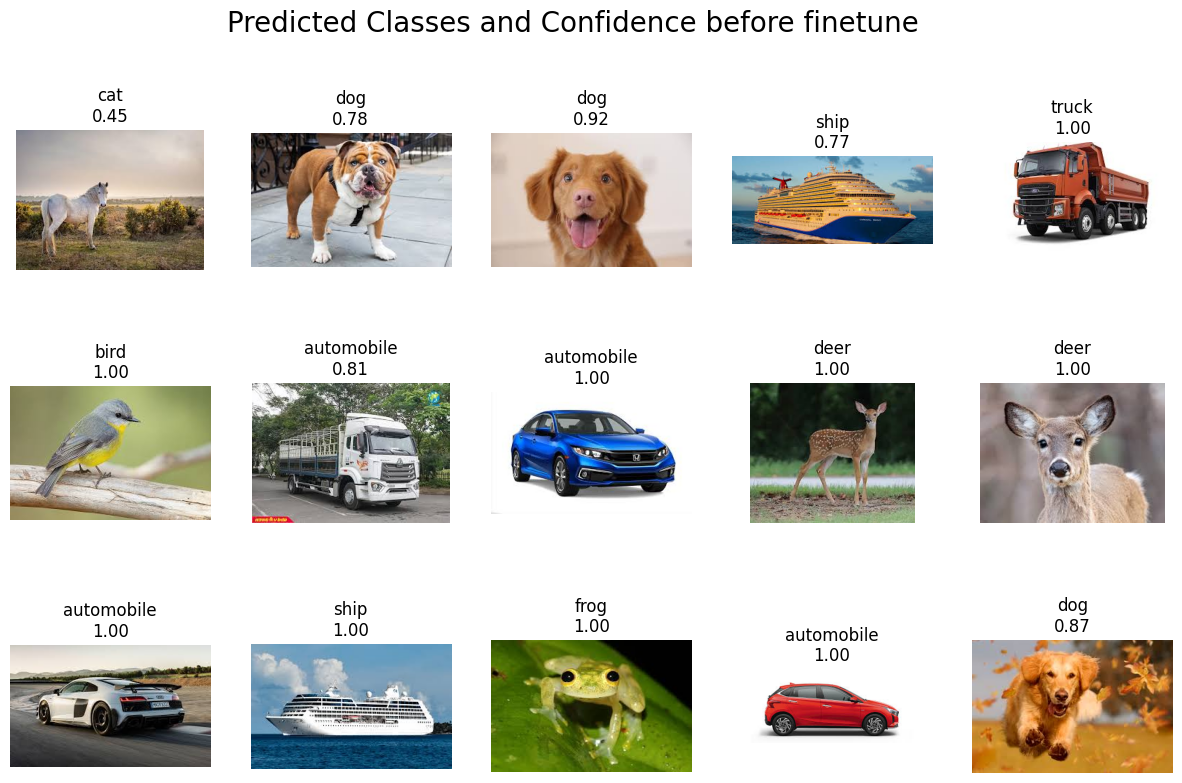

In [94]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

def get_classes_from_folder(folder_path):
    classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    classes.sort()  # Sắp xếp danh sách các class để đảm bảo thứ tự nhất quán
    return classes
# Định nghĩa các lớp trong CIFAR-10
train_folder_path = r'D:\AI\SelfLearn\Pytorch\data\cifar10\test'
classes = get_classes_from_folder(train_folder_path)
print(f'Classes: {classes}')

# Khởi tạo mô hình ResNet-18
model_load_evaluated = models.resnet18(pretrained=False)
num_ftrs = model_load_evaluated.fc.in_features
model_load_evaluated.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load trọng số đã huấn luyện
model_load_evaluated.load_state_dict(torch.load('resnet18_finetuned.pth'))
model_load_evaluated.to(device)
model_load_evaluated.eval()

# Hàm để tiền xử lý ảnh
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    img = Image.open(image_path)
    img = preprocess(img)
    img = img.unsqueeze(0)  # Thêm batch dimension
    return img

# Hàm để dự đoán ảnh kèm theo độ tự tin
def predict_image(image_path):
    img = preprocess_image(image_path).to(device)
    with torch.no_grad():
        outputs = model_load_evaluated(img)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        confidence, predicted = torch.max(probabilities, 0)
        class_name = classes[predicted.item()]
    return class_name, confidence.item()

# Hàm để hiển thị ảnh kèm nhãn
def display_images_with_predictions(folder_path):
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('jpg', 'png', 'jpeg'))]
    num_images = len(images)
    
    plt.figure(figsize=(15, 15))
    # plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.8)
    plt.suptitle('Predicted Classes and Confidence before finetune', fontsize=20)
    plt.subplots_adjust(bottom=0.3, top=0.9, hspace=0.8)
    
    for i, image_path in enumerate(images):
        
        predicted_class, confidence = predict_image(image_path)
        img = Image.open(image_path)
        plt.subplot((num_images // 5) + 1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{predicted_class}\n{confidence:.2f}')
        plt.axis('off')
        
    # plt.subplots_adjust(wspace=0.1, hspace=1)
    
    plt.show()

# Thay thế 'path_to_your_folder' bằng đường dẫn tới thư mục chứa ảnh của bạn
folder_path = r'D:\AI\SelfLearn\Pytorch\data\More'
display_images_with_predictions(folder_path)


# Fine tuned

In [51]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình ResNet-18 và thay đổi fully connected layer
model_finetune = torchvision.models.resnet18(pretrained=False)
num_ftrs = model_finetune.fc.in_features
model_finetune.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load state_dict từ checkpoint và bỏ qua fc layer
checkpoint = torch.load('resnet18_finetuned.pth')
checkpoint = {k: v for k, v in checkpoint.items() if not k.startswith('fc')}
model_finetune_dict = model_finetune.state_dict()
model_finetune_dict.update(checkpoint)
model_finetune.load_state_dict(model_finetune_dict)

# Chuyển mô hình tới device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_finetune.to(device)

# Định nghĩa hàm mất mát và optimizer cho fine-tuning
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_finetune.parameters(), lr=0.001)  # Thay đổi learning rate tùy theo nhu cầu

# Chuẩn bị dữ liệu huấn luyện mới
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# trainset_new = torchvision.datasets.ImageFolder(root='./data', transform=transform)
# trainloader_new = torch.utils.data.DataLoader(trainset_new, batch_size=32, shuffle=True, num_workers=2)
trainloader_new = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
# Fine-tune mô hình
num_epochs = 5  # Số epochs cho quá trình fine-tuning
model_finetune.train()  # Chuyển sang chế độ huấn luyện

for epoch in range(num_epochs):
    total_loss = 0.0
    correct = 0
    total = 0
    
    # Training phase
    progress_bar = tqdm(trainloader_new, desc=f'Epoch {epoch + 1}/{num_epochs}')
    for inputs, labels in progress_bar:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_finetune(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass và cập nhật weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Tính toán tổng loss
        total_loss += loss.item()
        
        # Tính toán độ chính xác
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Cập nhật progress bar với loss và accuracy
        progress_bar.set_postfix(loss=loss.item(), accuracy=100 * correct / total)
    
    # In ra loss và accuracy trung bình của epoch hiện tại
    avg_loss = total_loss / len(trainloader_new)
    avg_accuracy = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Avg Loss: {avg_loss:.4f}, Avg Accuracy: {avg_accuracy:.2f}%')

print('Finished fine-tuning.')

# Lưu mô hình sau khi fine-tuning
torch.save(model_finetune.state_dict(), 'resnet18_finetuned_after.pth')


Epoch 1/5: 100%|██████████| 391/391 [09:45<00:00,  1.50s/it, accuracy=86, loss=0.383]  


Epoch [1/5], Avg Loss: 0.4085, Avg Accuracy: 86.00%


Epoch 2/5: 100%|██████████| 391/391 [10:13<00:00,  1.57s/it, accuracy=92.3, loss=0.286] 


Epoch [2/5], Avg Loss: 0.2224, Avg Accuracy: 92.33%


Epoch 3/5: 100%|██████████| 391/391 [11:04<00:00,  1.70s/it, accuracy=95, loss=0.0826]  


Epoch [3/5], Avg Loss: 0.1468, Avg Accuracy: 94.95%


Epoch 4/5: 100%|██████████| 391/391 [11:11<00:00,  1.72s/it, accuracy=96.1, loss=0.112] 


Epoch [4/5], Avg Loss: 0.1129, Avg Accuracy: 96.07%


Epoch 5/5: 100%|██████████| 391/391 [11:12<00:00,  1.72s/it, accuracy=97.2, loss=0.0958]

Epoch [5/5], Avg Loss: 0.0795, Avg Accuracy: 97.20%
Finished fine-tuning.


# Evaluate

In [56]:

# Khởi tạo mô hình ResNet-18
model_load_evaluated = models.resnet18(pretrained=False)
num_ftrs = model_load_evaluated.fc.in_features
model_load_evaluated.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load trọng số đã huấn luyện
model_load_evaluated.load_state_dict(torch.load('resnet18_finetuned_after.pth'))
model_load_evaluated.to(device)


# Đánh giá mô hình trên bộ dữ liệu kiểm tra
model_load_evaluated.eval()
total_testing_accuracies = []
total_losses = []
with torch.no_grad():
    for test_inputs, test_labels in testloader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)

        # Forward pass
        test_outputs = model_load_evaluated(test_inputs)
        _, test_predicted = torch.max(test_outputs, 1)

        # Tính toán độ chính xác
        test_accuracy = accuracy_score(test_predicted.cpu().numpy(), test_labels.cpu().numpy())
        total_testing_accuracies.append(test_accuracy)

        # Tính toán hàm mất mát (loss)
        loss = nn.CrossEntropyLoss()(test_outputs, test_labels)
        total_losses.append(loss.item())

# Tính toán độ chính xác trung bình và loss trung bình trên toàn bộ bộ dữ liệu kiểm tra
avg_test_accuracy = sum(total_testing_accuracies) / len(total_testing_accuracies)
avg_test_loss = sum(total_losses) / len(total_losses)

# In ra kết quả đánh giá
print(f'Average Testing Accuracy: {avg_test_accuracy:.4f}')
print(f'Average Testing Loss: {avg_test_loss:.4f}')


d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\AI\SelfLearn\Pytorch\pytorch_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Average Testing Accuracy: 0.8960
Average Testing Loss: 0.3630


# Recognition Images

In [9]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Định nghĩa các lớp trong CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Khởi tạo mô hình ResNet-18
model_load_evaluated = models.resnet18(pretrained=False)
num_ftrs = model_load_evaluated.fc.in_features
model_load_evaluated.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Load trọng số đã huấn luyện
model_load_evaluated.load_state_dict(torch.load('resnet18_finetuned_after.pth'))
model_load_evaluated.to(device)
model_load_evaluated.eval()

# Hàm để tiền xử lý ảnh
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    img = Image.open(image_path)
    img = preprocess(img)
    img = img.unsqueeze(0)  # Thêm batch dimension
    return img

# Hàm để dự đoán ảnh
def predict_image(image_path):
    img = preprocess_image(image_path).to(device)
    with torch.no_grad():
        outputs = model_load_evaluated(img)
        _, predicted = torch.max(outputs, 1)
        class_name = classes[predicted.item()]
    return class_name

# Sử dụng hàm để dự đoán một ảnh bất kỳ
image_path = r'D:\AI\SelfLearn\Pytorch\data\More\download (2).jpg'  # Thay thế bằng đường dẫn tới ảnh của bạn
predicted_class = predict_image(image_path)
print(f'Dự đoán lớp của ảnh là: {predicted_class}')


cuda
Dự đoán lớp của ảnh là: bird


Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


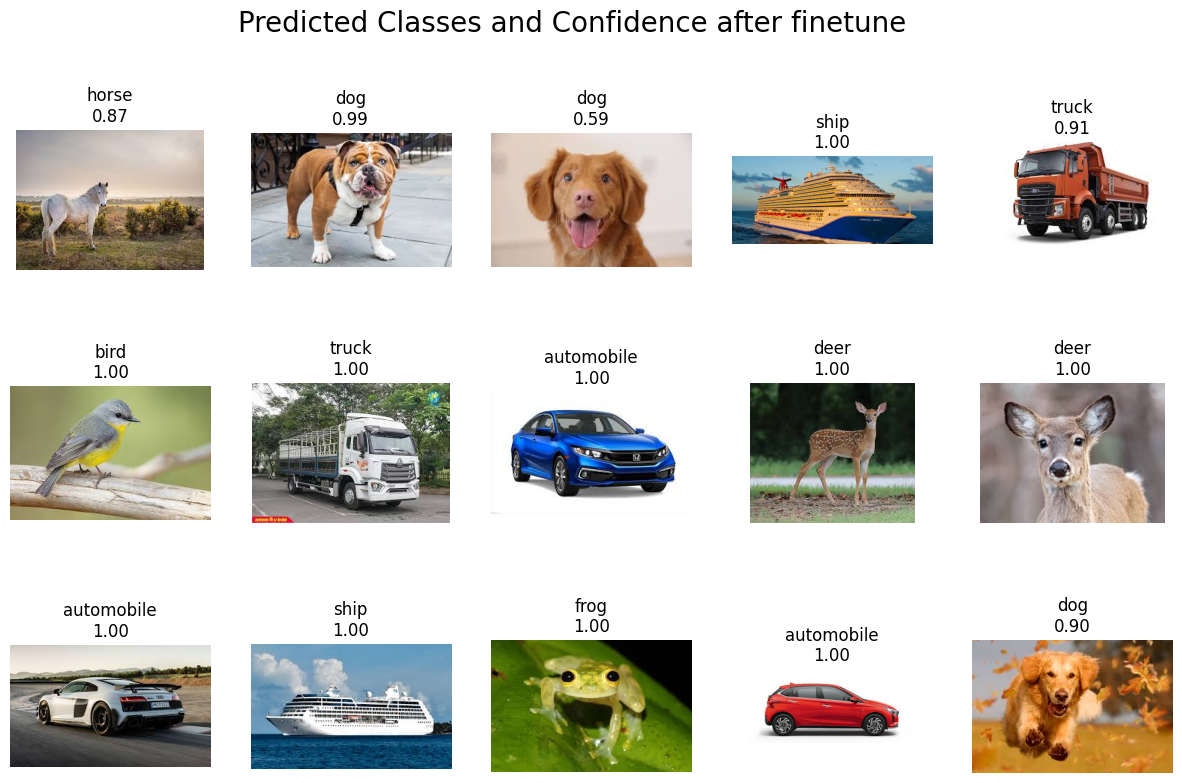

In [95]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

def get_classes_from_folder(folder_path):
    classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    classes.sort()  # Sắp xếp danh sách các class để đảm bảo thứ tự nhất quán
    return classes
# Định nghĩa các lớp trong CIFAR-10
train_folder_path = r'D:\AI\SelfLearn\Pytorch\data\cifar10\test'
classes = get_classes_from_folder(train_folder_path)
print(f'Classes: {classes}')

# Khởi tạo mô hình ResNet-18
model_load_evaluated = models.resnet18(pretrained=False)
num_ftrs = model_load_evaluated.fc.in_features
model_load_evaluated.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load trọng số đã huấn luyện
model_load_evaluated.load_state_dict(torch.load('resnet18_finetuned_after.pth'))
model_load_evaluated.to(device)
model_load_evaluated.eval()

# Hàm để tiền xử lý ảnh
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize dữ liệu
        
    ])
    img = Image.open(image_path)
    img = preprocess(img)
    img = img.unsqueeze(0)  # Thêm batch dimension
    return img

# Hàm để dự đoán ảnh kèm theo độ tự tin
def predict_image(image_path):
    img = preprocess_image(image_path).to(device)
    with torch.no_grad():
        outputs = model_load_evaluated(img)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        confidence, predicted = torch.max(probabilities, 0)
        class_name = classes[predicted.item()]
    return class_name, confidence.item()

# Hàm để hiển thị ảnh kèm nhãn
def display_images_with_predictions(folder_path):
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('jpg', 'png', 'jpeg'))]
    num_images = len(images)
    plt.figure(figsize=(15, 15))
    plt.suptitle('Predicted Classes and Confidence after finetune', fontsize=20)
    plt.subplots_adjust(bottom=0.3, top=0.9, hspace=0.8)
    for i, image_path in enumerate(images):
        predicted_class, confidence = predict_image(image_path)
        img = Image.open(image_path)
        plt.subplot((num_images // 5) + 1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{predicted_class}\n{confidence:.2f}')
        plt.axis('off')
        
    # plt.subplots_adjust(wspace=0.1, hspace=1)
    
    plt.show()

# Thay thế 'path_to_your_folder' bằng đường dẫn tới thư mục chứa ảnh của bạn
folder_path = r'D:\AI\SelfLearn\Pytorch\data\More'
display_images_with_predictions(folder_path)


# Evaluate with each lable 

In [60]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Định nghĩa các lớp trong CIFAR-10
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Khởi tạo mô hình ResNet-18
model_load_evaluated = models.resnet18(pretrained=False)
num_ftrs = model_load_evaluated.fc.in_features
model_load_evaluated.fc = nn.Linear(num_ftrs, 10)  # Số lượng classes là 10 cho CIFAR-10

# Load trọng số đã huấn luyện
model_load_evaluated.load_state_dict(torch.load('resnet18_finetuned_after.pth'))
model_load_evaluated.to(device)

# Đánh giá mô hình trên bộ dữ liệu kiểm tra
model_load_evaluated.eval()
total_testing_accuracies = []
total_losses = []

# Theo dõi số lượng dự đoán đúng và tổng số mẫu cho mỗi nhãn
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for test_inputs, test_labels in testloader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)

        # Forward pass
        test_outputs = model_load_evaluated(test_inputs)
        _, test_predicted = torch.max(test_outputs, 1)

        # Tính toán độ chính xác
        test_accuracy = accuracy_score(test_predicted.cpu().numpy(), test_labels.cpu().numpy())
        total_testing_accuracies.append(test_accuracy)

        # Tính toán hàm mất mát (loss)
        loss = nn.CrossEntropyLoss()(test_outputs, test_labels)
        total_losses.append(loss.item())

        # Cập nhật số lượng dự đoán đúng và tổng số mẫu cho mỗi nhãn
        for i in range(len(test_labels)):
            label = test_labels[i]
            prediction = test_predicted[i]
            if label == prediction:
                class_correct[label] += 1
            class_total[label] += 1

# Tính toán độ chính xác trung bình và loss trung bình trên toàn bộ bộ dữ liệu kiểm tra
avg_test_accuracy = sum(total_testing_accuracies) / len(total_testing_accuracies)
avg_test_loss = sum(total_losses) / len(total_losses)

# In ra kết quả đánh giá
print(f'Average Testing Accuracy: {avg_test_accuracy:.4f}')
print(f'Average Testing Loss: {avg_test_loss:.4f}')

# Tính toán và hiển thị độ chính xác cho từng nhãn
for i in range(10):
    if class_total[i] > 0:
        accuracy = class_correct[i] / class_total[i]
        print(f'Accuracy of {classes[i]} : {accuracy:.4f}')
    else:
        print(f'Accuracy of {classes[i]} : No samples')


Average Testing Accuracy: 0.8960
Average Testing Loss: 0.3630
Accuracy of airplane : 0.8370
Accuracy of automobile : 0.9520
Accuracy of bird : 0.8450
Accuracy of cat : 0.7420
Accuracy of deer : 0.9750
Accuracy of dog : 0.8250
Accuracy of frog : 0.9500
Accuracy of horse : 0.9090
Accuracy of ship : 0.9700
Accuracy of truck : 0.9540
